In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 400
Nr = 20
Ntheta = 20
dpi= 2*np.pi

r = np.linspace(0, 2, Nr)
theta = np.linspace(0, dpi, Ntheta)
t = np.linspace(0, 3, Nt)

deltar = r[1] - r[0]
deltatheta = theta[1] - theta[0]
deltat = t[1] - t[0]

v = 3.

lambda_ = v * deltat / deltar
mu_ = v * deltat / (r[1] * deltatheta)

print(lambda_, mu_)

0.21428571428571427 0.647987982588431


In [3]:
def ui(r, theta):
    cost = np.cos(theta)
    return 2 * (r - 1) * (cost - 1)

In [4]:
u = np.zeros((Nt, Nr, Ntheta))
for i in range(len(r)):
    for j in range(len(theta)):
        u[0, i, j] = ui(r[i], theta[j])

In [5]:
def GetSolution():

    gamma = 3 * deltat

    for l in tqdm(range(1, len(t))):

        if l == 1:
            u[l, :, :] = u[l - 1, :, :]
        else:

            for i in range(1, len(r) - 1):
                for j in range(1, len(theta) - 1):
                    u[l, i, j] = 2 * (1 - lambda_**2 - mu_**2) * u[l - 1, i, j] \
                                 + lambda_**2 * (u[l - 1, i + 1, j] + u[l - 1, i - 1, j]) \
                                 + mu_**2 * (u[l - 1, i, j + 1] + u[l - 1, i, j - 1]) \
                                 - u[l - 2, i, j] \
                                 - gamma * u[l - 1, i, j] \
                                 + gamma * u[l - 2, i, j]

In [6]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 399/399 [00:00<00:00, 1069.81it/s]


<IPython.core.display.Javascript object>


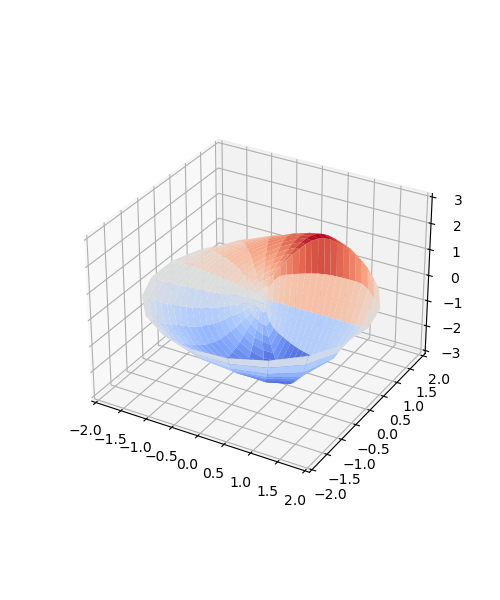

In [7]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')

R, Theta = np.meshgrid(r, theta)

def init():
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-3, 3)

def Update(i):
    ax.clear()
    init()
    ax.plot_surface(R * np.cos(Theta), R * np.sin(Theta), u[i, :, :], cmap='coolwarm')

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)
plt.show()